# Linear Regression Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Data


* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [5]:
df= pd.read_csv("Ecommerce Customers")

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**


In [10]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

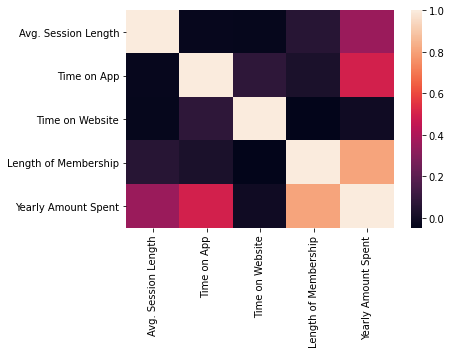

In [12]:
sns.heatmap(df.corr())

In [17]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

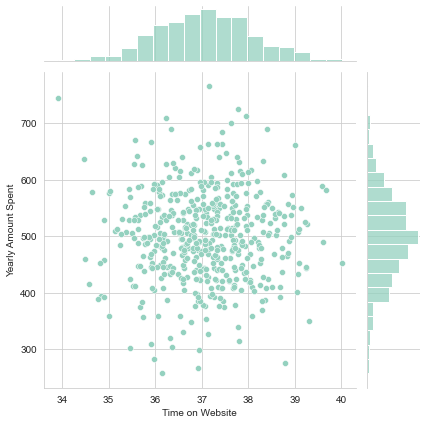

In [18]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

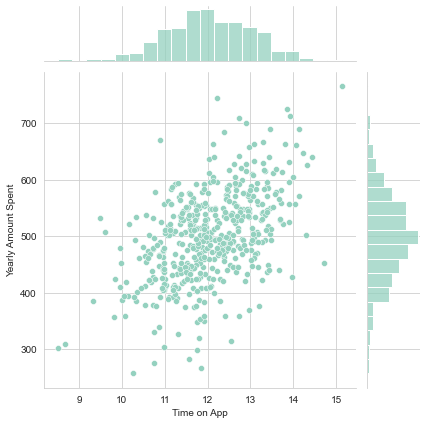

In [19]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

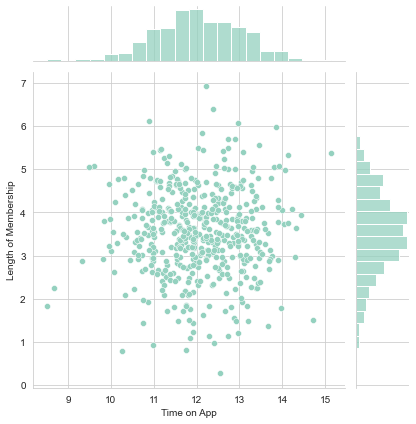

In [21]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df)

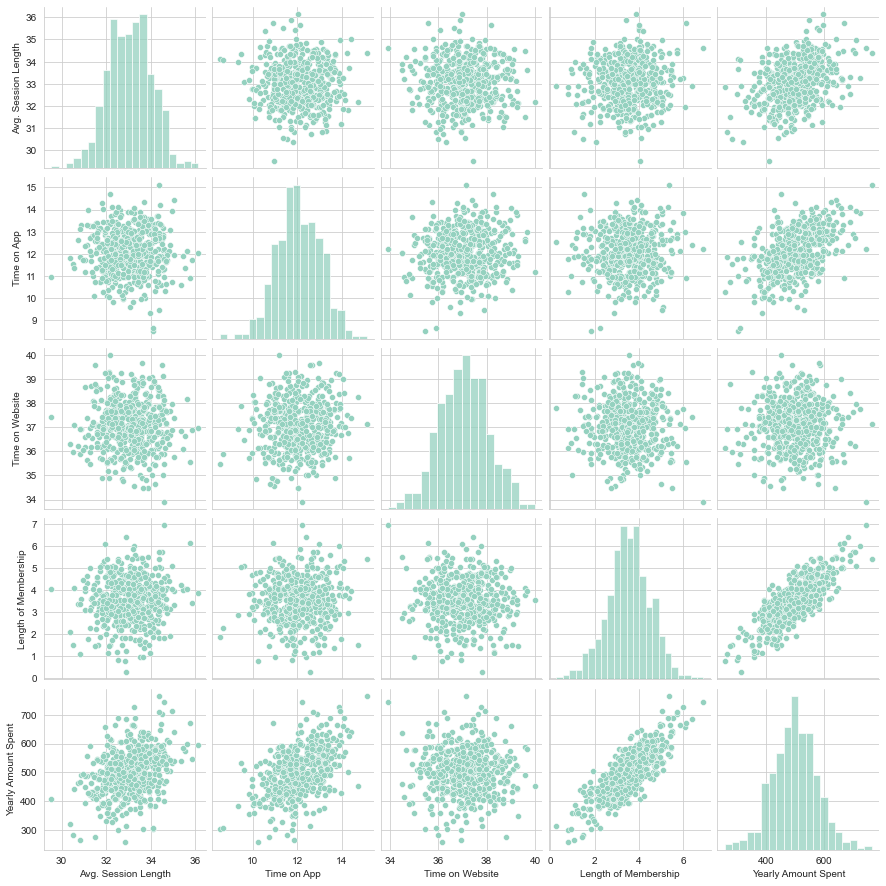

In [22]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

**all parameters look scattered except length of membership, as it looks linearly increasing**

c:\users\vemul\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


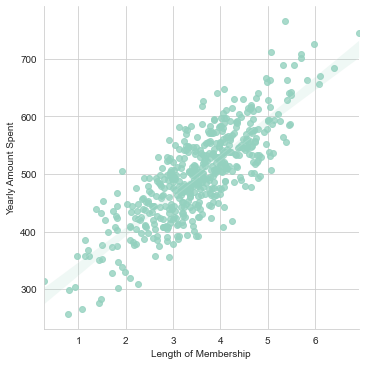

In [26]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=df)

## Training and Testing Data

In [28]:
y=df['Yearly Amount Spent']

In [29]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [30]:
X=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train,y_train)

LinearRegression()

In [36]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data

In [37]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

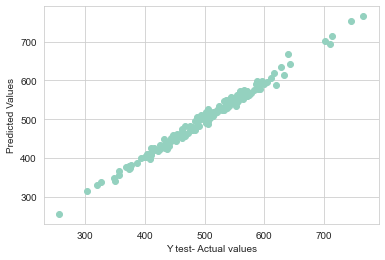

In [39]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test- Actual values')
plt.ylabel('Predicted Values')

## Evaluating the Model



In [41]:
from sklearn import metrics

In [42]:
#Mean Absolute Error
metrics.mean_absolute_error(y_test,predictions)

7.22814865343082

In [43]:
#Mean Squared Error
metrics.mean_squared_error(y_test,predictions)

79.81305165097419

In [44]:
#Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test,predictions))

8.93381506697862

## Residuals

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

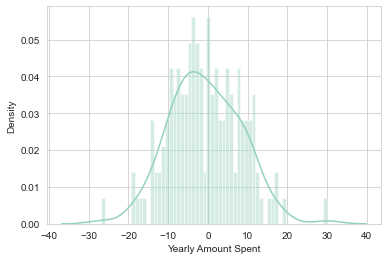

In [51]:
sns.distplot((y_test-predictions), bins=60)

## Conclusion

In [53]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeffecients'])

,Coeffecients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**

If we want to know which we have to concentrate whether on mobile application or website. We have to look over this coefficients.

So, as app is being more used than website, we probably want to develop website more inorder to increase the flow to the website. Or else we may want to develop Mobile app, as its already popular.

Finally there may be case for developing web, mobile app based on the company requirements.